<a href="https://colab.research.google.com/github/andresgabas/DSIII-/blob/main/Proyecto_final_DS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de prediccion de fake news.

En este trabajo se utilizará la base de datos tweets.csv descargada de Kaggle del siguiente link: https://www.kaggle.com/datasets/vstepanenko/disaster-tweets.

Se intentará crear un modelo que prediga a partir del dataset elegido si los tweets de desastres son reales o no.


El dataset tiene las siguientes columnas:

id: Número para identificar el tweet.

Keyword: Es la palabra que indicaría que se trata de un desastre.

Location: De qué país es el tweet.

Text: Es el texto del tweet.

Target: Si el tweet es de un desastre real (1) o no es real (0)


# Análisis y manipulación de la base de datos.

In [1]:
import pandas as pd

In [2]:
import nltk # importar natural language toolkit
nltk.download('punkt')
nltk.download('stopwords') # modulo para descargar stopwords en diferentes idiomas
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import numpy  as np
import re
import string
import plotly
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/andresgabas/DSIII-/refs/heads/main/tweets.csv')
print(df)

          id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  
0      Communal violence in Bhainsa, Telangana. "Ston...       1  
1      Telangana: Section 144 has been imposed in Bha...       1  
2      Arsonist sets cars ablaze at dealership https:...       1  
3      Arsonist sets cars ablaze at dealership https:...       1  
4      "Lord Jesus, your love brings freedom and pard...       0

In [4]:
df.shape

(11370, 5)

In [5]:
# prompt: remove column id, location

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/andresgabas/DSIII-/refs/heads/main/tweets.csv')
df = df.drop(['id', 'location','keyword'], axis=1)
df

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
11365,Media should have warned us well in advance. T...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [7]:
df.shape

(11370, 2)

Con el siguiente código veo si hay valores nulos.

In [8]:
df.isnull().sum()

,0
text,0
target,0


Se realiza un histograma contando los variables de la columna target.

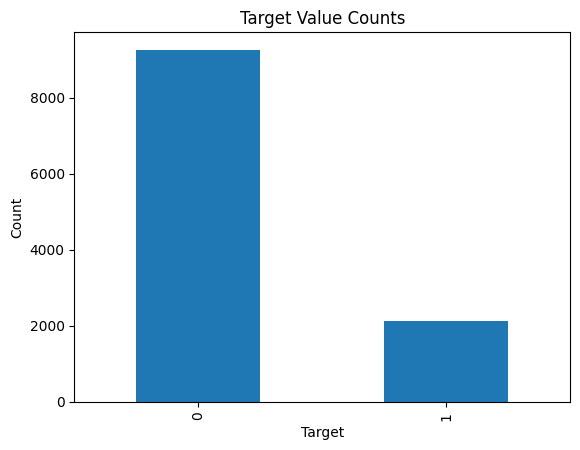

In [11]:
# prompt: Create histogram with value counts for target column

df['target'].value_counts().plot(kind='bar')
plt.title('Target Value Counts')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Se observa que los mayor parte de los resultados se corresponden con el cero o desastres no reales.

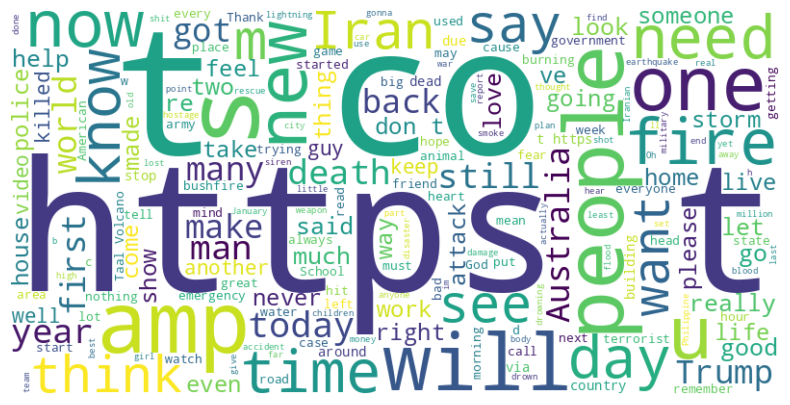

In [12]:
# prompt: Create wordcloud graph with column text

def wordcloud_graph(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage with the 'text' column of your DataFrame
text_combined = " ".join(df['text'].astype(str)) # Combine all text data into a single string
wordcloud_graph(text_combined)

In [15]:
# prompt: Convertir palabras de la columna text a minuscula, y mostrar el resultado

# Convert text column to lowercase
df['text'] = df['text'].str.lower()

# Display the updated DataFrame
df

,text,target
0,"communal violence in bhainsa, telangana. ""ston...",1
1,telangana: section 144 has been imposed in bha...,1
2,arsonist sets cars ablaze at dealership https:...,1
3,arsonist sets cars ablaze at dealership https:...,1
4,"""lord jesus, your love brings freedom and pard...",0
...,...,...
11365,media should have warned us well in advance. t...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? t...",0


In [16]:
# prompt: Remove special characters from column text

import pandas as pd
import re

# ... (your existing code) ...

def remove_special_characters(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_special_characters)

# Display the updated DataFrame
df

,text,target
0,communal violence in bhainsa telangana stones ...,1
1,telangana section 144 has been imposed in bhai...,1
2,arsonist sets cars ablaze at dealership httpst...,1
3,arsonist sets cars ablaze at dealership httpst...,1
4,lord jesus your love brings freedom and pardon...,0
...,...,...
11365,media should have warned us well in advance th...,0
11366,i feel directly attacked i consider moonbin a...,0
11367,i feel directly attacked i consider moonbin a...,0
11368,ok who remember outcast nd the dora au those a...,0


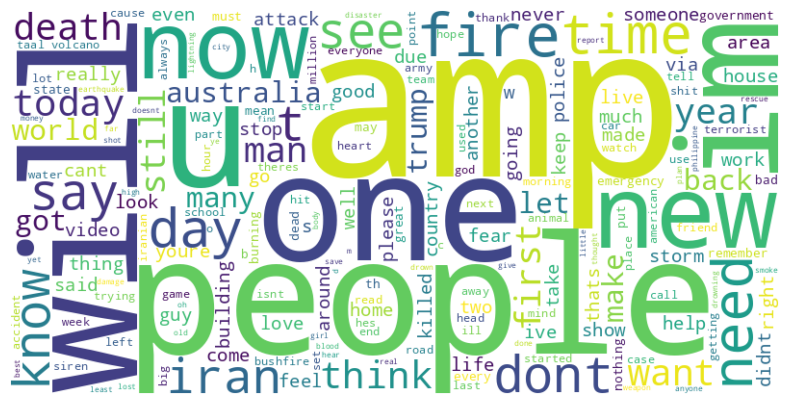

In [17]:
# prompt: Create wordcloud graph with column text

def wordcloud_graph(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage with the 'text' column of your DataFrame
text_combined = " ".join(df['text'].astype(str)) # Combine all text data into a single string
wordcloud_graph(text_combined)

# Adaptación de la base de datosa para usar los modelos.

Primero se convierten las palabras de la columna texto en tokens.

In [32]:
# prompt: Convert words in column text to tokens

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Assuming your DataFrame is named 'df' and the text column is 'text'
# If not, replace 'df' and 'text' with the correct names

def tokenize_column(df, text):
    """Tokenizes the specified column in a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame.
        column_name: The name of the column containing the text.

    Returns:
        A new DataFrame with an added 'tokens' column containing the tokenized text.
    """

    # Download required NLTK data if not already present
    try:
        word_tokenize("test")  # Check if punkt is downloaded
    except LookupError:
        nltk.download('punkt')
    # Download punkt_tab for sentence tokenization
    nltk.download('punkt_tab') # Download the 'punkt_tab' resource


    df['text'] = df['text'].apply(word_tokenize)
    return df

# Example usage
df = tokenize_column(df, 'text')
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,target
0,"[communal, violence, in, bhainsa, telangana, s...",1
1,"[telangana, section, 144, has, been, imposed, ...",1
2,"[arsonist, sets, cars, ablaze, at, dealership,...",1
3,"[arsonist, sets, cars, ablaze, at, dealership,...",1
4,"[lord, jesus, your, love, brings, freedom, and...",0
...,...,...
11365,"[media, should, have, warned, us, well, in, ad...",0
11366,"[i, feel, directly, attacked, i, consider, moo...",0
11367,"[i, feel, directly, attacked, i, consider, moo...",0
11368,"[ok, who, remember, outcast, nd, the, dora, au...",0


Luego se eliminan las stopwords.

In [34]:
# prompt: remove stop words from column text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df['text'] = df['text'].apply(remove_stopwords)
df

,text,target
0,"[communal, violence, bhainsa, telangana, stone...",1
1,"[telangana, section, 144, imposed, bhainsa, ja...",1
2,"[arsonist, sets, cars, ablaze, dealership, htt...",1
3,"[arsonist, sets, cars, ablaze, dealership, htt...",1
4,"[lord, jesus, love, brings, freedom, pardon, f...",0
...,...,...
11365,"[media, warned, us, well, advance, wrecked, wh...",0
11366,"[feel, directly, attacked, consider, moonbin, ...",0
11367,"[feel, directly, attacked, consider, moonbin, ...",0
11368,"[ok, remember, outcast, nd, dora, au, au, wrec...",0


Creo un worldcloud para ver si hay cambios en las palabras luego de la remoción de la stopwords.

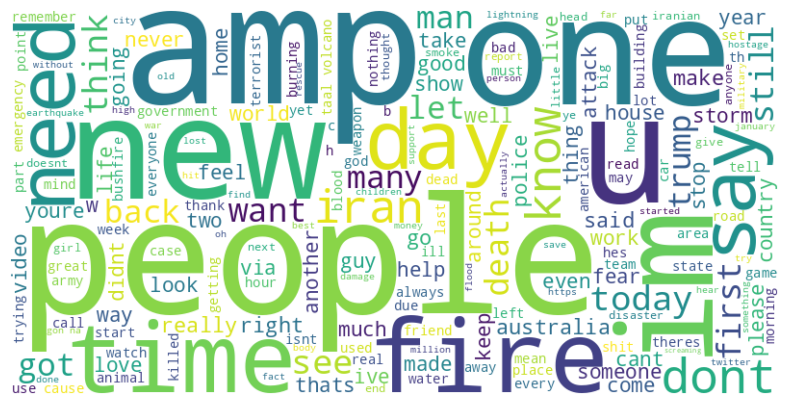

In [35]:
# prompt: Create worldcloud

def wordcloud_graph(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage with the 'text' column of your DataFrame
text_combined = " ".join([" ".join(x) for x in df['text'].values]) # Combine all text data into a single string
wordcloud_graph(text_combined)

# Modelo de Regresión Logística basado en bagworld

In [36]:
# prompt: Create a logistic regression model based on bagword with column target

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' is your DataFrame with 'text' and 'target' columns

# Join tokens back into strings for CountVectorizer
df['text'] = df['text'].apply(lambda x: ' '.join(x))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['target'], test_size=0.2, random_state=42
)

# Create a Bag-of-Words representation using CountVectorizer
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_bow)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9032541776605101
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1878
           1       0.82      0.57      0.67       396

    accuracy                           0.90      2274
   macro avg       0.87      0.77      0.81      2274
weighted avg       0.90      0.90      0.90      2274



# Modelo de regresión logistica basado en TF-IDF

In [37]:
# prompt: Create a logistic regression model based on TF-IDF with column target

# Convert the text data to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_bow)
X_test_tfidf = tfidf_transformer.transform(X_test_bow)

# Train a Logistic Regression model using TF-IDF features
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy with TF-IDF: {accuracy_tfidf}")
print(classification_report(y_test, y_pred_tfidf))

Accuracy with TF-IDF: 0.8834652594547053
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1878
           1       0.88      0.38      0.53       396

    accuracy                           0.88      2274
   macro avg       0.88      0.69      0.73      2274
weighted avg       0.88      0.88      0.86      2274



# Modelo Random Forest basado en TF-IDF

In [38]:
# prompt: Create Random Forest based en TF-IDF

from sklearn.ensemble import RandomForestClassifier

# ... (your existing code) ...

# Convert the text data to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_bow)
X_test_tfidf = tfidf_transformer.transform(X_test_bow)

# Train a Random Forest Classifier using TF-IDF features
model_rf = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
model_rf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy with Random Forest and TF-IDF: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Accuracy with Random Forest and TF-IDF: 0.8931398416886543
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1878
           1       0.83      0.48      0.61       396

    accuracy                           0.89      2274
   macro avg       0.87      0.73      0.77      2274
weighted avg       0.89      0.89      0.88      2274



Modelo de regresión logística con 2 Gram

In [49]:
# prompt: Vectorize with 2 grams

# ... (your existing code) ...

# Create a Bag-of-Words representation using CountVectorizer with 2-grams
vectorizer_2gram = CountVectorizer(ngram_range=(2, 2)) # Use ngram_range to specify 2-grams
X_train_bow_2gram = vectorizer_2gram.fit_transform(X_train)
X_test_bow_2gram = vectorizer_2gram.transform(X_test)

# Train a Logistic Regression model with 2-gram features
model_2gram = LogisticRegression(max_iter=1000)
model_2gram.fit(X_train_bow_2gram, y_train)

# Make predictions on the test set
y_pred_2gram = model_2gram.predict(X_test_bow_2gram)

# Evaluate the model
accuracy_2gram = accuracy_score(y_test, y_pred_2gram)
print(f"Accuracy with 2-grams: {accuracy_2gram}")
print(classification_report(y_test, y_pred_2gram))

Accuracy with 2-grams: 0.8759894459102903
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1878
           1       0.93      0.31      0.47       396

    accuracy                           0.88      2274
   macro avg       0.90      0.65      0.70      2274
weighted avg       0.88      0.88      0.85      2274



Modelo de regresión logística con 3 Gram


In [50]:
# prompt: Vectorize with 3 grams

# Create a Bag-of-Words representation using CountVectorizer with 3-grams
vectorizer_3gram = CountVectorizer(ngram_range=(3, 3))  # Use ngram_range to specify 3-grams
X_train_bow_3gram = vectorizer_3gram.fit_transform(X_train)
X_test_bow_3gram = vectorizer_3gram.transform(X_test)

# Train a Logistic Regression model with 3-gram features
model_3gram = LogisticRegression(max_iter=1000)
model_3gram.fit(X_train_bow_3gram, y_train)

# Make predictions on the test set
y_pred_3gram = model_3gram.predict(X_test_bow_3gram)

# Evaluate the model
accuracy_3gram = accuracy_score(y_test, y_pred_3gram)
print(f"Accuracy with 3-grams: {accuracy_3gram}")
print(classification_report(y_test, y_pred_3gram))

Accuracy with 3-grams: 0.8685136323658751
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1878
           1       0.96      0.26      0.40       396

    accuracy                           0.87      2274
   macro avg       0.91      0.63      0.66      2274
weighted avg       0.88      0.87      0.84      2274



Modelo de Random Forest basado en TF-IDF con 3 Gram.


In [51]:
# prompt: Create Random Forest based en TF-IDF with 2 grams

# Convert the text data to TF-IDF representation with 2-grams
tfidf_transformer_2gram = TfidfTransformer()
X_train_tfidf_2gram = tfidf_transformer_2gram.fit_transform(X_train_bow_2gram)
X_test_tfidf_2gram = tfidf_transformer_2gram.transform(X_test_bow_2gram)

# Train a Random Forest Classifier using TF-IDF features with 2-grams
model_rf_2gram = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_2gram.fit(X_train_tfidf_2gram, y_train)

# Make predictions on the test set
y_pred_rf_2gram = model_rf_2gram.predict(X_test_tfidf_2gram)

# Evaluate the model
accuracy_rf_2gram = accuracy_score(y_test, y_pred_rf_2gram)
print(f"Accuracy with Random Forest and TF-IDF with 2-grams: {accuracy_rf_2gram}")
print(classification_report(y_test, y_pred_rf_2gram))

Accuracy with Random Forest and TF-IDF with 2-grams: 0.8808267370272648
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1878
           1       0.89      0.36      0.51       396

    accuracy                           0.88      2274
   macro avg       0.89      0.67      0.72      2274
weighted avg       0.88      0.88      0.86      2274



# Conclusiones